<a href="https://colab.research.google.com/github/Somalin2004/somalincode/blob/main/fraud_card_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv("creditcard.csv")  # Use actual dataset path

# Separate features and labels
X = df.drop(columns=["Class"])
y = df["Class"]

# Only use non-fraud data for training
X_legit = X[y == 0]

# Standardize the features
scaler = StandardScaler()
X_legit_scaled = scaler.fit_transform(X_legit)

In [ ]:
input_dim = X_legit_scaled.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_legit_scaled, X_legit_scaled, epochs=20, batch_size=256, shuffle=True)

Epoch 1/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0110
Epoch 2/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7821
Epoch 3/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7715
Epoch 4/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7415
Epoch 5/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7464
Epoch 6/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7282
Epoch 7/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7257
Epoch 8/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7225
Epoch 9/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7275
Epoch 10/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7182
Epoch 11/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7196
Epoch 12/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7128
Epoch 13/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7165
Epoch 14/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7410
Epoch 15/20
1111/1111 ━━━━━━━

In [ ]:
# Sample from original legitimate data
num_samples = 5000
indices = np.random.randint(0, X_legit_scaled.shape[0], num_samples)
samples = X_legit_scaled[indices]

# Generate synthetic data using the autoencoder
synthetic_legit = autoencoder.predict(samples)

# Convert back to original scale
synthetic_legit_original = scaler.inverse_transform(synthetic_legit)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
# Add noise to simulate fraud
synthetic_fraud = synthetic_legit + np.random.normal(0, 1, synthetic_legit.shape) * 0.5
synthetic_fraud_original = scaler.inverse_transform(synthetic_fraud)

In [ ]:
df_legit = pd.DataFrame(synthetic_legit_original)
df_legit["Class"] = 0

df_fraud = pd.DataFrame(synthetic_fraud_original)
df_fraud["Class"] = 1

df_synthetic = pd.concat([df_legit, df_fraud]).sample(frac=1).reset_index(drop=True)


Logistic Regression - Accuracy: 0.4913
Confusion Matrix:
[[750 750]
 [776 724]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      1500
           1       0.49      0.48      0.49      1500

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



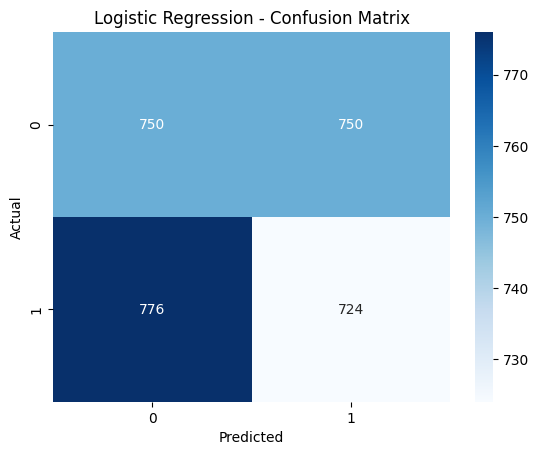


Decision Tree - Accuracy: 0.9953
Confusion Matrix:
[[1496    4]
 [  10 1490]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1500
           1       1.00      0.99      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



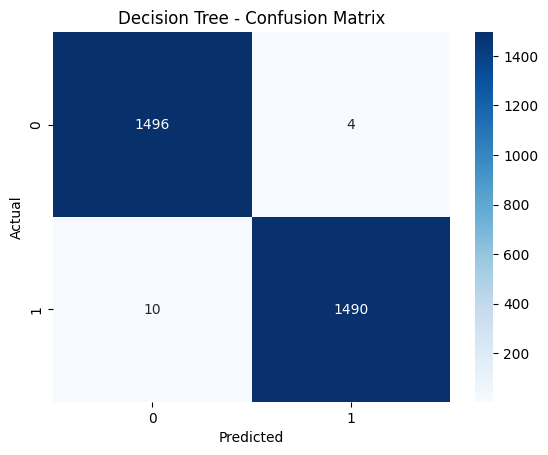

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load synthetic dataset (replace this with actual generated data if saved)
# Example: df_synthetic = pd.read_csv("synthetic_creditcard.csv")

# Assume df_synthetic is already in your workspace
# Last column is "Class", all others are features
X = df_synthetic.drop(columns=["Class"])
y = df_synthetic["Class"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# ------------------------------
# Logistic Regression
# ------------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# ------------------------------
# Decision Tree
# ------------------------------
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# ------------------------------
# Evaluation Function
# ------------------------------
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    print(f"\n{model_name} - Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ------------------------------
# Evaluate Models
# ------------------------------
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")